     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


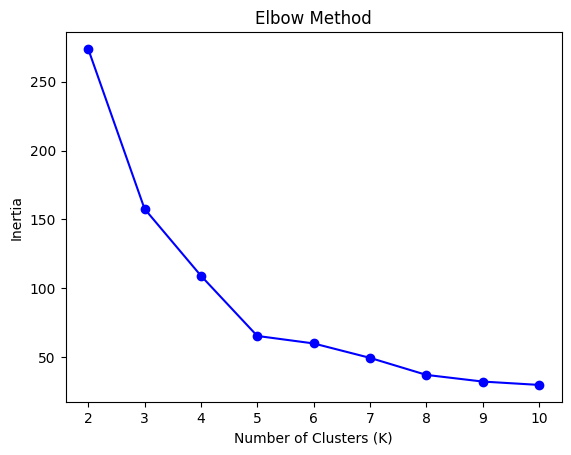

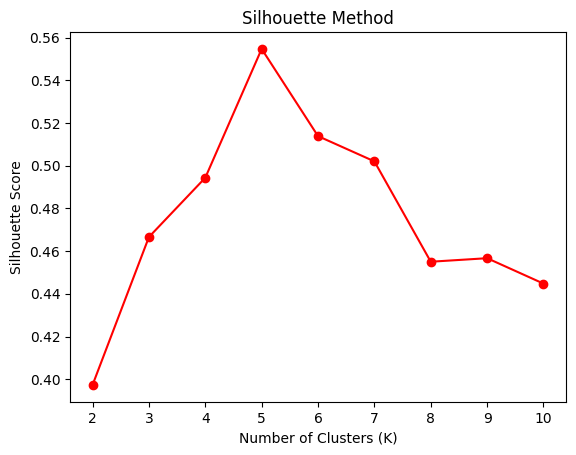

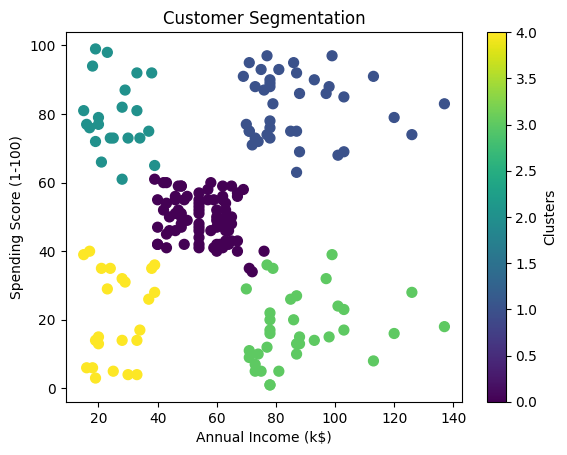

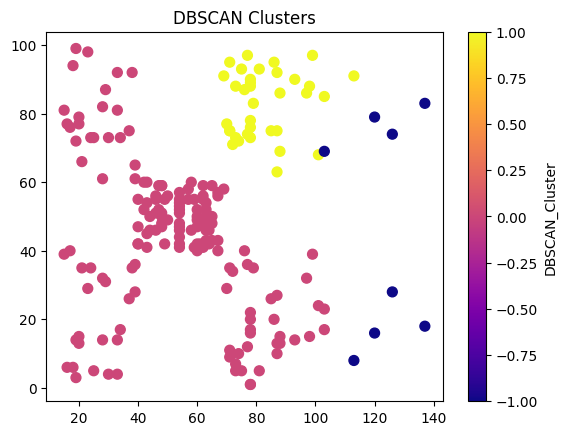


Average Spending per KMeans cluster:
           Annual Income (k$)  Spending Score (1-100)
Clusters                                            
0                  55.296296               49.518519
1                  86.538462               82.128205
2                  25.727273               79.363636
3                  88.200000               17.114286
4                  26.304348               20.913043

Average Spending per DBSCAN cluster:
                 Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
0                        52.490446               43.101911
1                        82.542857               82.800000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

df = pd.read_csv("Mall_Customers.csv")
print(df)

X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

kmeans = KMeans(n_clusters= 5, random_state= 42)
df["Clusters"] = kmeans.fit_predict(X_scaler)

inertia = []
silhouette = []
K = range (2, 11)

for k in K:
    kmeans = KMeans (n_clusters= k, random_state= 42)
    labels = kmeans.fit_predict(X_scaler)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaler, labels))

plt.plot(K, inertia, "bo-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

plt.plot(K, silhouette, "ro-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c= df["Clusters"], cmap= "viridis", s= 50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation")
plt.colorbar(label = "Clusters")
plt.show()

dbscan = DBSCAN(eps= 0.5, min_samples= 5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaler)

plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c= df["DBSCAN_Cluster"], cmap= "plasma", s= 50)
plt.title("DBSCAN Clusters")
plt.colorbar(label = "DBSCAN_Cluster")
plt.show()

Cluster_avg = df.groupby("Clusters")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("\nAverage Spending per KMeans cluster:\n", Cluster_avg)

dbscan_avg = df[df["DBSCAN_Cluster"] != -1].groupby("DBSCAN_Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("\nAverage Spending per DBSCAN cluster:\n", dbscan_avg)